# Import libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Import data

In [18]:
data = pd.read_csv("task_data.csv", index_col='ID')
data.head(3)

,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
ID,,,,,,,,,,,,,
1,0,172,405,"0,424691358",1682.360871,3153.671880,-638.531109,-0.304239,"68,8186",0.213446,"679,4873689",24898,75419
2,1,159,391,"0,4066496164",1526.660960,5102.159054,-889.678405,-0.539387,"73,92564",0.203652,"788,6589419",29851,94494
5,0,208,400,"0,52",2465.903392,5376.834707,-1755.344699,-0.371163,"69,33974",0.320787,"862,3229369",33653,66666


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1 to 50
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cardiomegaly                37 non-null     int64  
 1   Heart width                 37 non-null     int64  
 2   Lung width                  37 non-null     int64  
 3   CTR - Cardiothoracic Ratio  37 non-null     object 
 4   xx                          37 non-null     float64
 5   yy                          37 non-null     float64
 6   xy                          37 non-null     float64
 7   normalized_diff             37 non-null     float64
 8   Inscribed circle radius     37 non-null     object 
 9   Polygon Area Ratio          37 non-null     float64
 10  Heart perimeter             37 non-null     object 
 11  Heart area                  37 non-null     int64  
 12  Lung area                   37 non-null     int64  
dtypes: float64(5), int64(5), object(3)
memory 

In [20]:
data['Heart perimeter'] = data['Heart perimeter'].str.replace(',', '.').astype('float')
data['Inscribed circle radius'] = data['Inscribed circle radius'].str.replace(',', '.').astype('float')
data['CTR - Cardiothoracic Ratio'] = data['CTR - Cardiothoracic Ratio'].str.replace(',', '.').astype('float')

In [21]:
data.describe()

,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.756757,206.351351,413.810811,0.501246,2286.269336,4730.006310,-805.167329,-0.344805,77.774585,0.274054,820.337625,34402.378378,81486.783784
std,0.434959,29.283306,36.771696,0.077404,638.801580,1095.268932,398.022620,0.145481,7.888490,0.057254,78.850158,6187.119516,14730.330918
min,0.000000,148.000000,341.000000,0.391982,1214.923424,3076.280456,-1755.344699,-0.651767,64.536810,0.181388,654.859953,22583.000000,51018.000000
25%,1.000000,189.000000,396.000000,0.436725,1833.841218,3969.359793,-995.735145,-0.432405,72.339480,0.223339,758.114786,29120.000000,70212.000000
50%,1.000000,204.000000,407.000000,0.497685,2197.853422,4812.389570,-831.472858,-0.360424,76.419890,0.264131,821.955404,33591.000000,83123.000000
75%,1.000000,223.000000,432.000000,0.538874,2465.903392,5376.834707,-638.531109,-0.284012,83.862980,0.320787,877.979790,39256.000000,92058.000000
max,1.000000,266.000000,498.000000,0.718157,3961.102462,8378.677729,211.472229,-0.031457,100.244700,0.421824,1001.068103,46381.000000,116542.000000


In [22]:
new_cols = [col.strip().replace(' ', '_') for col in data.columns]
data.columns = new_cols
data.columns

Index(['Cardiomegaly', 'Heart_width', 'Lung_width',
       'CTR_-_Cardiothoracic_Ratio', 'xx', 'yy', 'xy', 'normalized_diff',
       'Inscribed_circle_radius', 'Polygon_Area_Ratio', 'Heart_perimeter',
       'Heart_area', 'Lung_area'],
      dtype='object')

# Data analysis

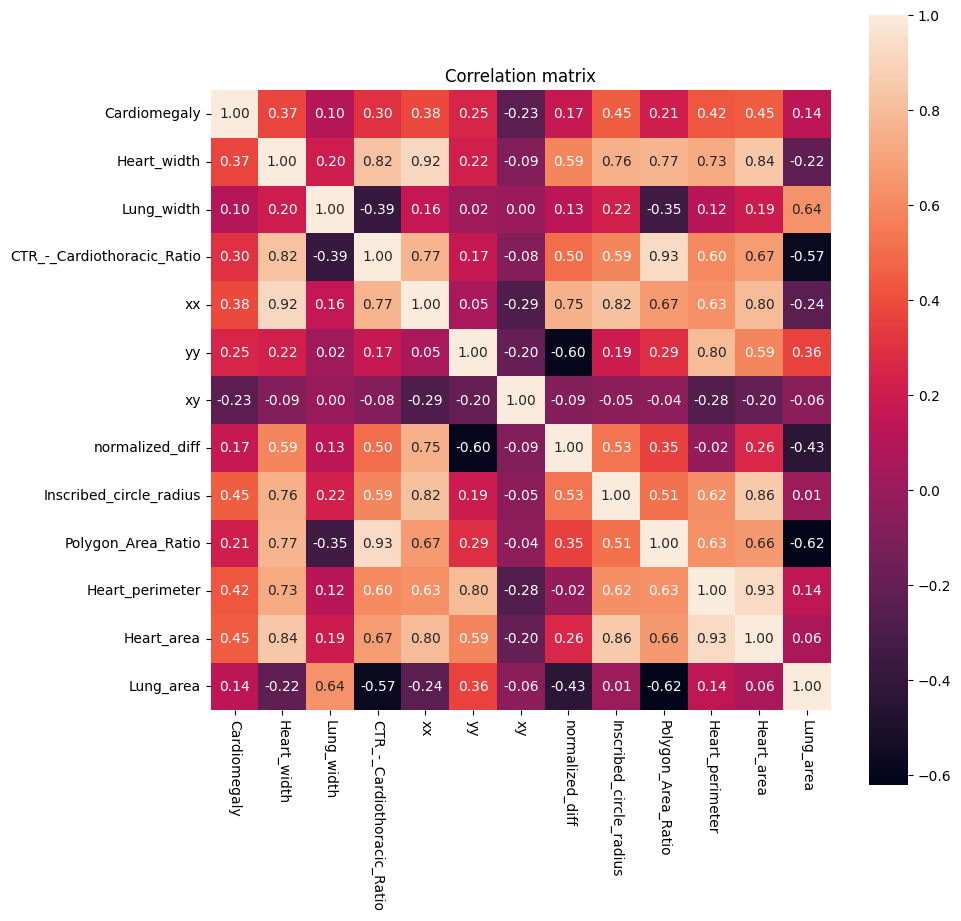

In [23]:
corrcoef = np.corrcoef(data.values.T)
plt.figure(figsize=(10 , 10))
sns.heatmap(corrcoef,
            annot = True, square = True, fmt = '.2f', xticklabels = data.columns, yticklabels = data.columns)
plt.xticks(rotation=270)
plt.title('Correlation matrix')
plt.show()

<Figure size 2000x2000 with 0 Axes>

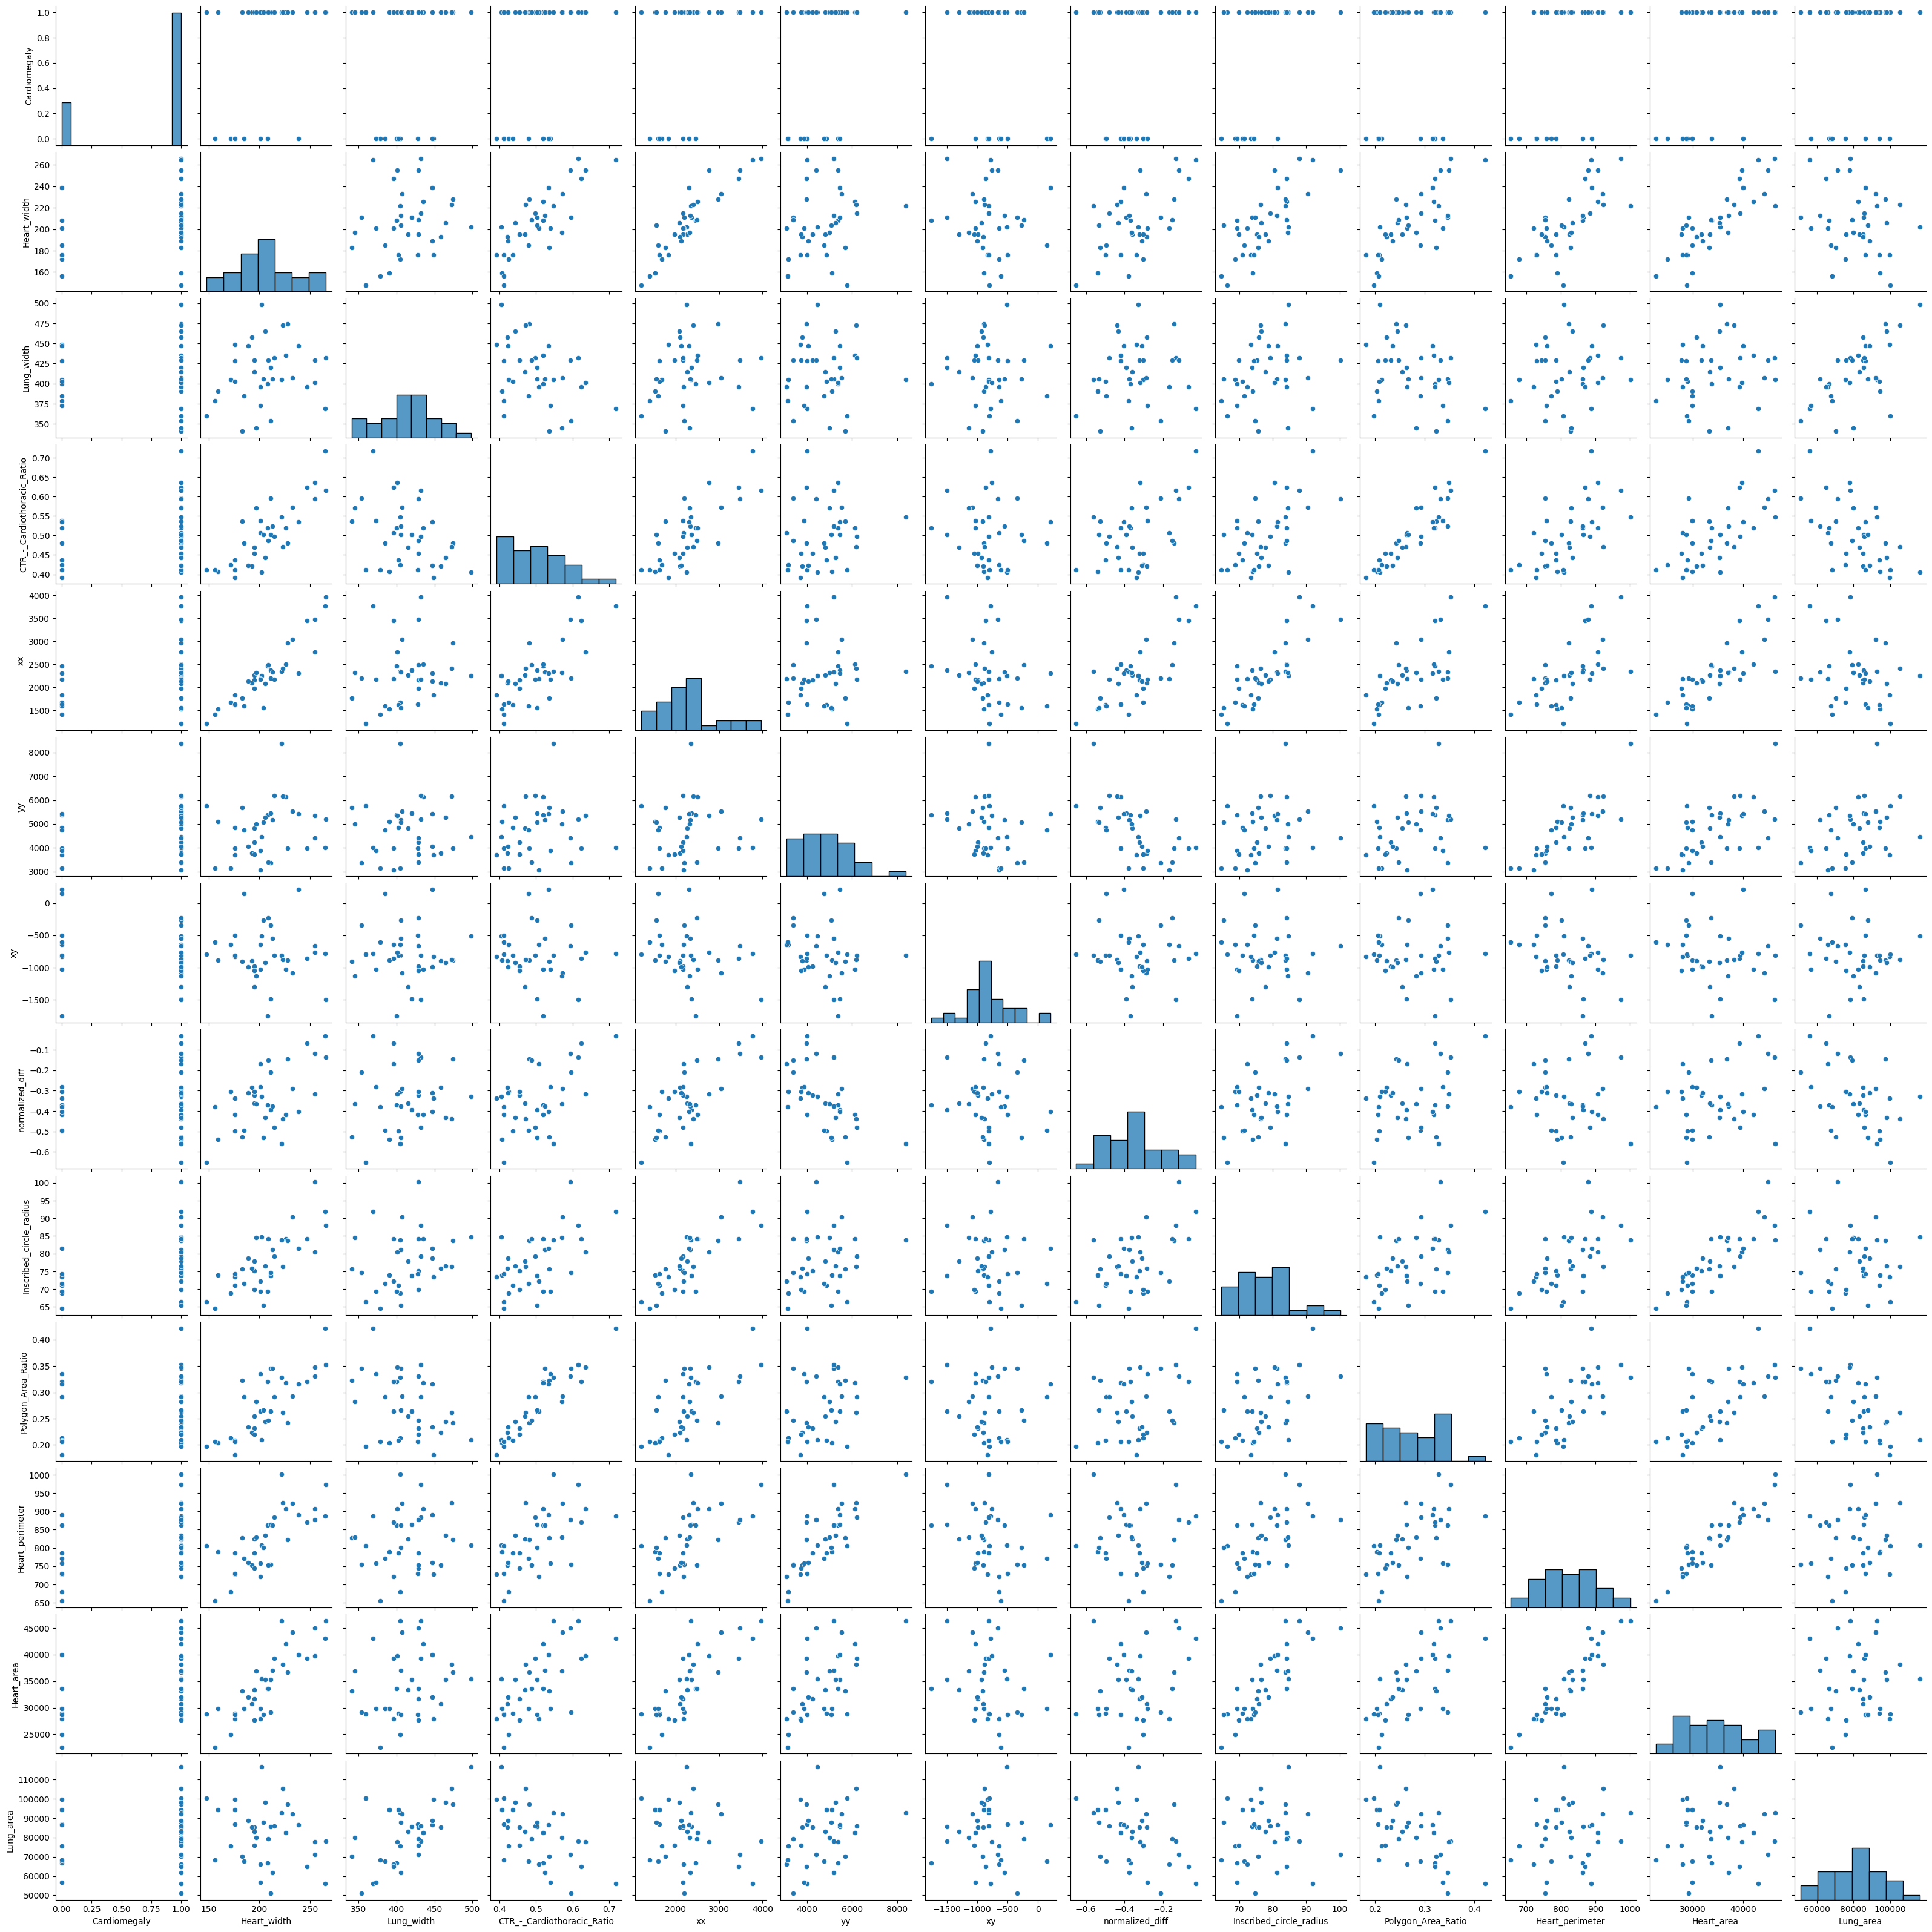

In [24]:
plt.figure(figsize=(20, 20))
sns.pairplot(data)
plt.show()

In [25]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)
X_std = scaler.transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

# Preparing model

## Support Vector Machine (SVM)

In [36]:
pipe_svc = Pipeline(steps=[
    ("scaler", StandardScaler()),   
    ("model", SVC(           
        kernel="rbf",             
        class_weight='balanced'
    ))
])

param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__gamma": [0.001, 0.01, 0.1, 1, 'scale']
}

grid_search = GridSearchCV(
    estimator=pipe_svc,
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'model__C': 0.01, 'model__gamma': 'scale'}
Best accuracy: 0.850


In [37]:
cv_score = np.round(cross_val_score(grid_search.best_estimator_, X_train, y_train), 2)

print(f"Scores of training data cross-validation:")
list(map(print, cv_score))
print(f"\nCross-validation mean score: {np.mean(cv_score):.3f}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")

Scores of training data cross-validation:
0.83
0.67
0.67
0.33
0.2

Cross-validation mean score: 0.540
Standard deviation of CV score: 0.236


## Logistic Regression

In [39]:
pipe_log = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        solver="liblinear",
        class_weight="balanced",
        max_iter=1000
    ))
])

param_grid = {
    "model__C": np.logspace(-3, 3, 10),
    "model__penalty": ["l1", "l2"]
}

grid_log = GridSearchCV(
    estimator=pipe_log,
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train, y_train)

print(f"Best parameters: {grid_log.best_params_}")
print(f"Best accuracy: {grid_log.best_score_:.3f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'model__C': np.float64(2.154434690031882), 'model__penalty': 'l2'}
Best accuracy: 0.795


In [40]:
cv_score = np.round(cross_val_score(grid_log.best_estimator_, X_train, y_train), 2)

print(f"Scores of training data cross-validation:")
list(map(print, cv_score))
print(f"\nCross-validation mean score: {np.mean(cv_score):.3f}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")

Scores of training data cross-validation:
0.33
0.67
0.67
0.67
0.8

Cross-validation mean score: 0.628
Standard deviation of CV score: 0.157


## Random Forest

In [42]:
pipe_rf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1 
    ))
])

param_grid = {
    "model__n_estimators": [100, 200], 
    "model__max_depth": [None, 3, 5], 
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],  
    "model__max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best accuracy: {grid_rf.best_score_:.3f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best accuracy: 0.745


In [43]:
cv_score = np.round(cross_val_score(grid_rf.best_estimator_, X_train, y_train), 2)

print(f"Scores of training data cross-validation:")
list(map(print, cv_score))
print(f"\nCross-validation mean score: {np.mean(cv_score):.3f}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")

Scores of training data cross-validation:
0.67
0.67
0.67
0.67
0.8

Cross-validation mean score: 0.696
Standard deviation of CV score: 0.052


## Model score

<table>
<tr><th>Classifier</th> <th>Best accuracy</th></tr>
<tr><td>SVM</td><td>85%</td></tr>
<tr><td>Logistic Regression</td><td>79.5%</td></tr>
<tr><td>Random Forest</td><td>74.5%</td></tr>
</table>

# Runing test data on models

In [52]:
y_pred_svc = grid_search.best_estimator_.predict(X_test)
y_pred_log = grid_log.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy on test set:")
print(f"- Accuracy of Support Vector Machine (SVM) model on test dataset:\t{acc_svc:.3f}")
print(f"- Accuracy of Logistic Regression model on test dataset:\t\t{acc_log:.3f}")
print(f"- Accuracy of Random Forest model on test dataset:\t\t\t{acc_rf:.3f}")

Accuracy on test set:
- Accuracy of Support Vector Machine (SVM) model on test dataset:	0.875
- Accuracy of Logistic Regression model on test dataset:		0.750
- Accuracy of Random Forest model on test dataset:			0.875
